In [1]:
import anndata
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
slice1 = anndata.read_h5ad('/SABench/Data/DLPFC_processed/151673_processed.h5ad')
slice2 = anndata.read_h5ad('/SABench/Data/DLPFC_processed/151674_processed.h5ad')

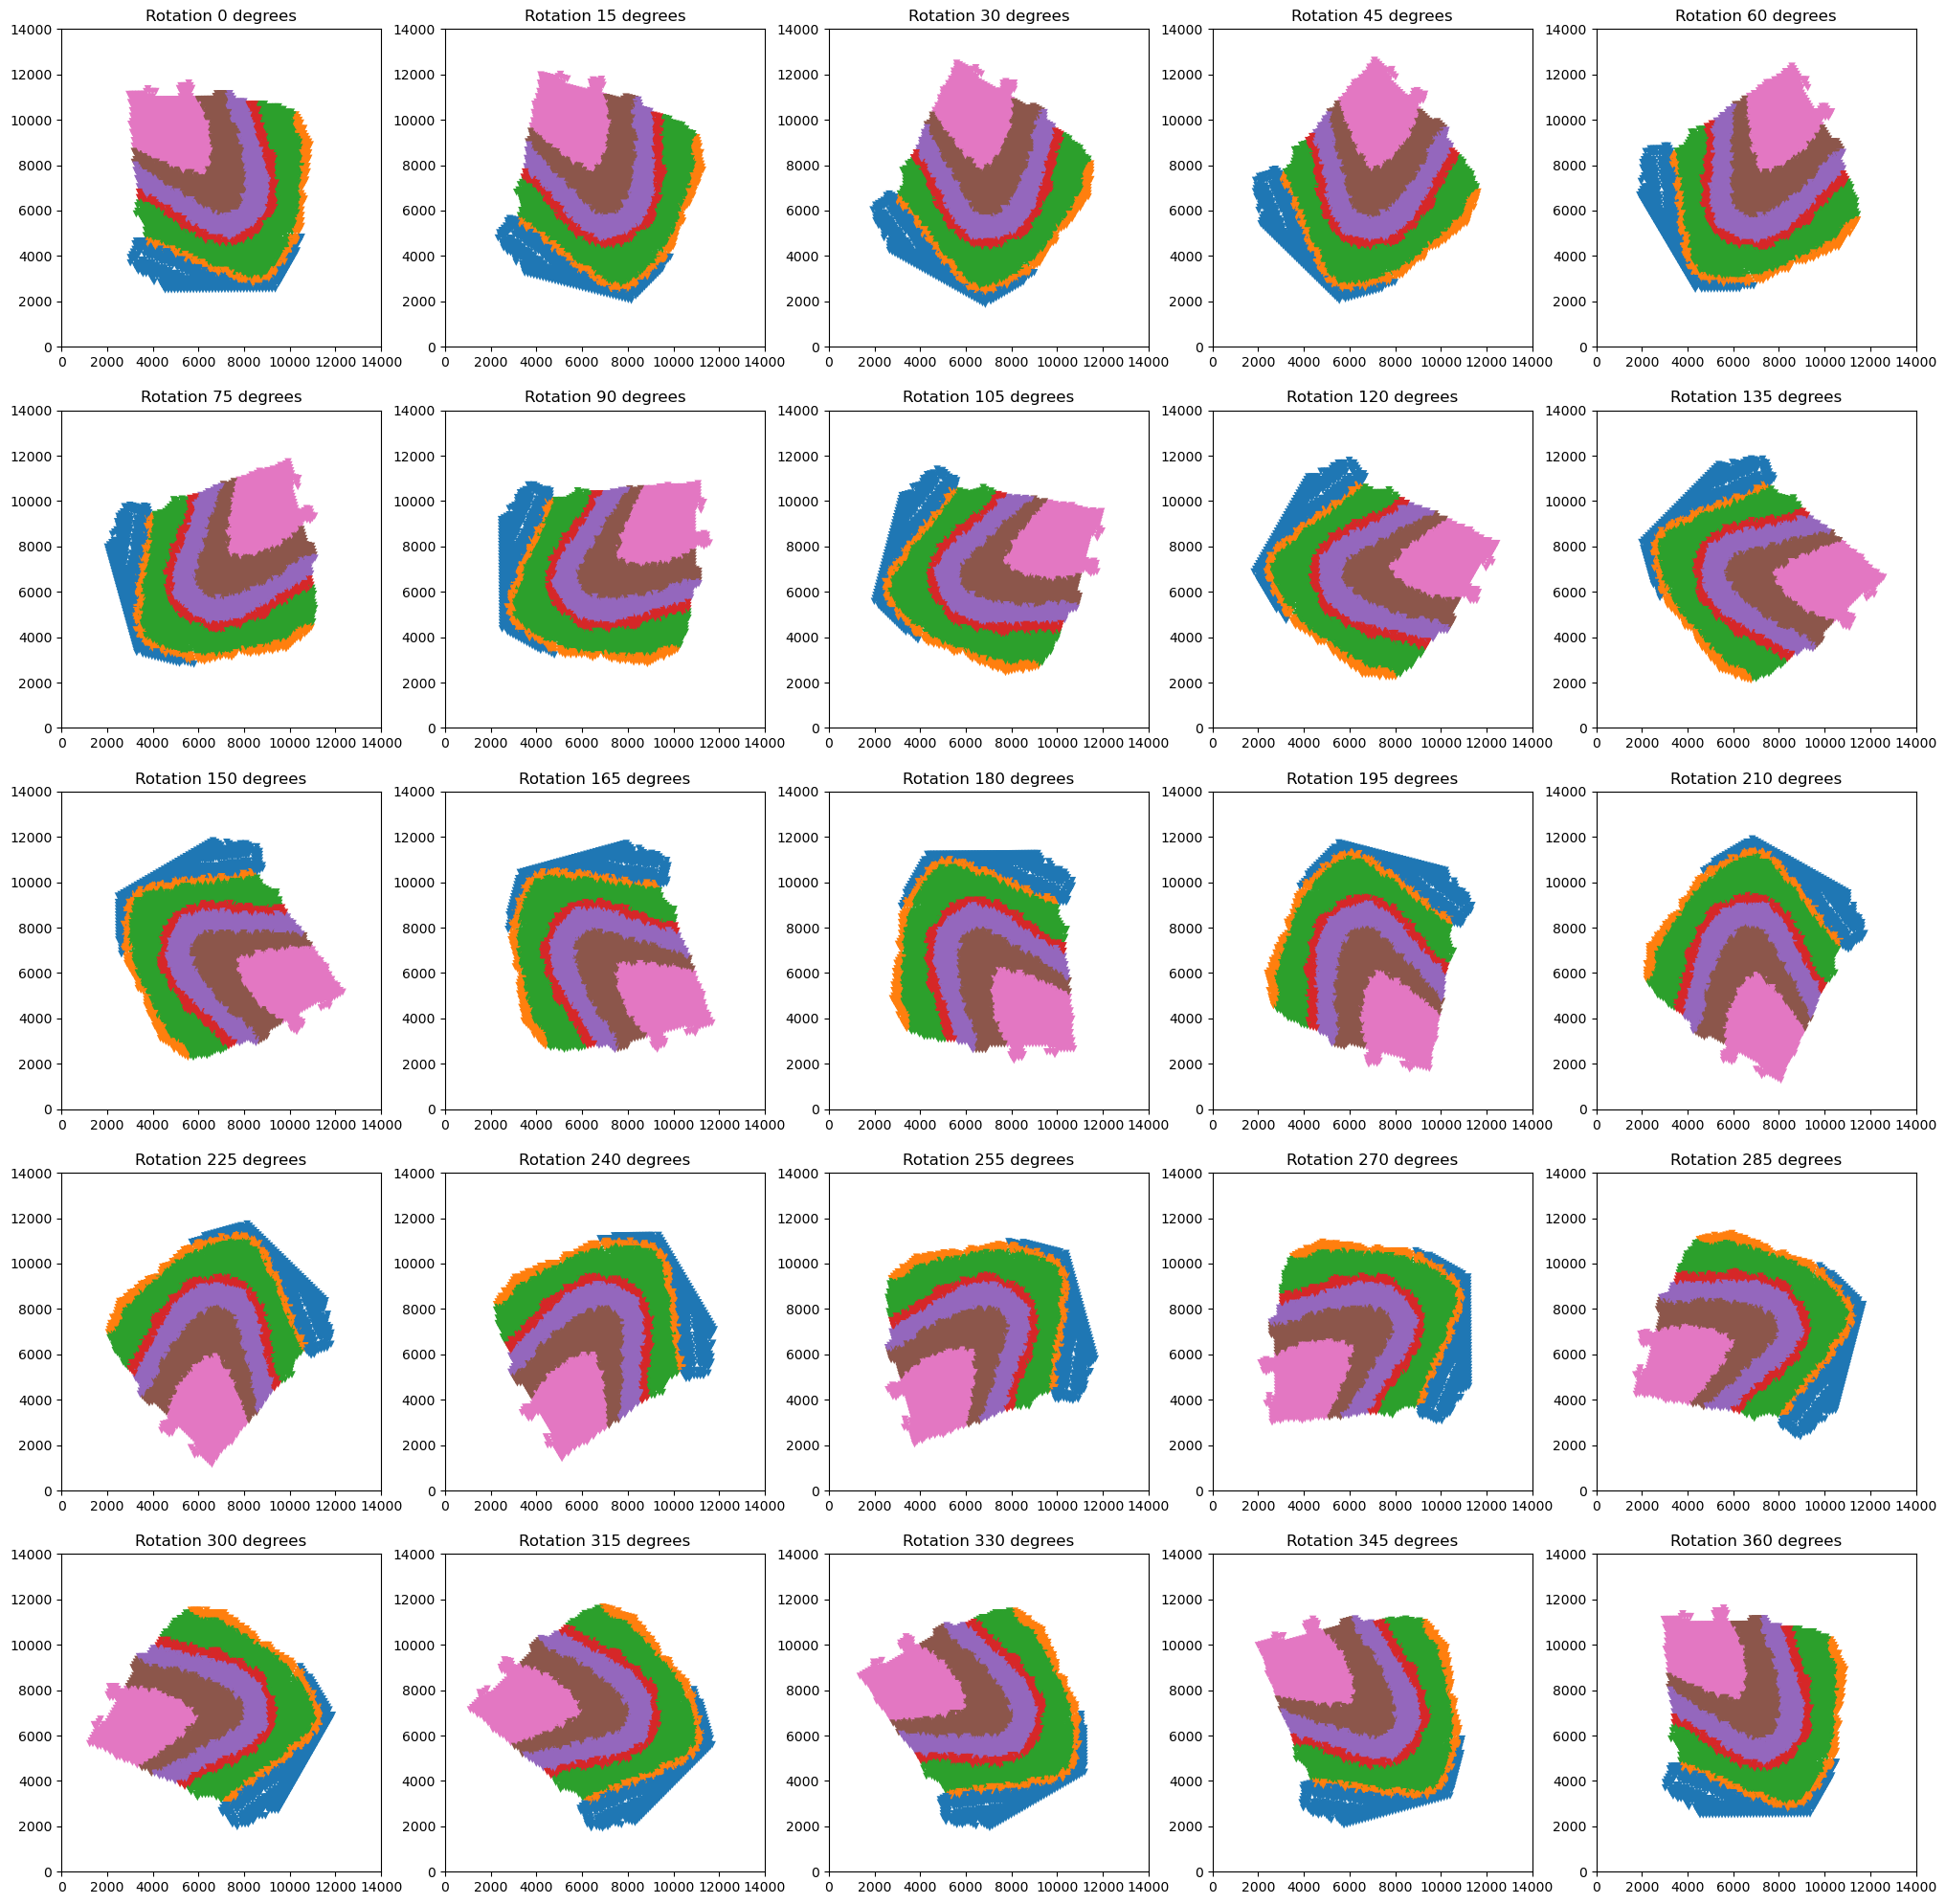

AnnData object with n_obs × n_vars = 3611 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'Region'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [6]:
#
def rotate_adata(slice, degree,save_path):
    adata=slice.copy()
    coords = adata.obsm['spatial']
    # 
    center = np.mean(coords, axis=0)

    # 
    coords_centered = coords - center

    theta = np.radians(degree)
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    rotated_coords = np.dot(coords_centered, rotation_matrix)

    # 
    rotated_coords = rotated_coords + center

    adata.obsm['spatial'] = rotated_coords
    adata.write_h5ad(save_path)
    return adata

angles = [i for i in range(0, 361, 15)]
fig, axs = plt.subplots(5, 5, figsize=(25, 25)) 

for index,degree in enumerate(angles):
    new_slice = rotate_adata(slice2, degree, f'/SABench/Data/DLPFC_rotated/151674_rotated_{degree}.h5ad')
    i = index // 5  
    j = index % 5  

    # 
    layer_to_color_map = {'Layer{0}'.format(i + 1): sns.color_palette()[i] for i in range(6)}
    layer_to_color_map['WM'] = sns.color_palette()[6]
    colors = list(new_slice.obs['Region'].astype('str').map(layer_to_color_map))

    axs[i,j].scatter(new_slice.obsm['spatial'][:, 0], new_slice.obsm['spatial'][:, 1], linewidth=0, s=30, marker="v",color=colors)  # 

    axs[i,j].set_title(f'Rotation {degree} degrees')

    x_limits = (0,14000)
    y_limits = (0,14000)
    axs[i,j].set_xlim(x_limits)
    axs[i,j].set_ylim(y_limits)

plt.show()

rotate_adata(slice1, 0, f'/SABench/Data/DLPFC_rotated/151673_rotated_0.h5ad')